# Looking for the **"All-in-one-cell"** example?

It's located [here at this link](https://colab.research.google.com/drive/1vAfDyKUmH2e48OQhWkWbDRWmGlXpaHEO?usp=sharing)

# Homework 7

This is a large notebook!

Use the collapsable sections, which include
+ a reading on _creating more data_ ... an interesting, undecided question in ML and modeling
+ data-cleaning for the flower data (irises, complete)
+ model-building for the flower data (knn, complete)
+ cleaning+modeling for the births data (to be completed!)
+ cleaning+modeling for the digits data (to be completed!)  
+ extra: clean and model your own data, or the Titanic data

Actually, this "extra-credit" will be regular-credit in _next week's_ hw, hw8

In [ ]:
#
# Let's practice the collapsing! And f-strings:
#

x = 42
ascii_emoji = "<3"

print(f"x is {x}.   We {ascii_emoji} f-strings!")


x is 42.   We <3 f-strings!



# Reading for hw7...   

<br>


This week's reading is a 2020 [Economist article (pdf)](https://drive.google.com/file/d/1tJC3jLjk_ZNzA1UTxREJGqzZg5pg2N24/view) on the pitfalls and promise of the data-driven era of AI we now inhabit.  The article takes a "data-based" view on recent developments and concerns in AI, especially machine-learning (or "statistical learning"). [original](https://www.economist.com/technology-quarterly/2020/06/11/for-ai-data-are-harder-to-come-by-than-you-think)


One of the newest ideas in this article is the possibility -- and possible importance -- of generating data to improve model-training, when available data is inequitable, inflexible, or insufficient in another way.   

Using the article and your own experience, what are your thoughts on artificially generating data to assist AI/ML training?  Possible jumping-off points include
+ (1) echo-chamber effects: can generated data yield more fairness -- or only reinforce existing biases?, or
+ (2) implementation concerns: what process would artificially generate the data?, or
+ (3) a specific example you've encountered, where a computational system generated data, but "got things obviously wrong" (there may be lots of these examples!)

In this last case, the generated data made the world's "data-landscape" worse, not better.  Alternative directions on artificially-generated data more than welcome!  

As with each week's reading, responses should be thoughtful, but need not be long: a 4-5 sentence paragraph is wonderful.

<hr>

Reading response

<br>

As someone who has worked in the radiology field, I knew a radiologist who can read chest x-rays in under a minute and we called him a "radiology AI", though often times, we found that his results were often similar based on which hospital they were sent from and the x-rays would have to be re-read by a more thorough radiologist (and angry) radiologist. As stated in the article, AI systems trained on such images from one hospital adopted the same flawed shortcuts as it struggled in images that were from different, unknown sources. This inefficiency forces human radiologists to re-evalute the AI's errors and can even skew the human's confidence in a result.


<br>

(Feel free to use this cell for your response.)

<br>
<hr>
<br>

# Data Cleaning: Iris data

This series of cells demonstrates how to use ``pandas`` to "clean" the ``iris.csv`` dataset, which has some intentional errors...

Note: for sure, you can always use excel or google sheets to clean data.

However, when you have _thousands_ of rows, you'll want scripting to help :-)

**Start by uploading** ``iris.csv`` to the folder whose icon is at left.

In [ ]:
#
# iris cleaner:  data-cleaning for iris modeling and classification
#

#
# Here, our goal is to
# [1] look over the iris.csv data...
# [2] clean it up, removing rows and columns we don't want to use
# [3] save the "cleaned-up data" to a new filename, iris_cleaned.csv

#
# Then, we can use iris_cleaned.csv for _ALL_ of our iris-modeling from here...
#

In [ ]:
#
# Side note only!
# # don't worry about this cell - it's just an example of a _SILLY_ data model
# # DON'T copy this cell over when you model the births-data or the digits-data
#
# It's here, because it's worth noting that we don't _need_ any data at all to create a predictive model!
#
# # Here is a model that is half hand-built and half random. No data is used!
#
import random

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    [ sepallen, sepalwid, petallen, petalwid ] = Features # unpacking!

    if petalwid < 1.0:
        return 'setosa (0)'
    else:
        return random.choice( ['versicolor (1)', 'virginica (2)'] )

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [ 4.6, 3.6, 3.0, 1.92 ]
result = predictive_model( Features )
print(f"from Features {Features},  I predict...   {result} ")

from Features [4.6, 3.6, 3.0, 1.92],  I predict...   versicolor (1) 


In [ ]:
#
# (Next, let's explore how we _can_ use data to do better... :-)
#

In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

<b><font color="Coral">Be sure to upload</font></b> the file ``iris.csv`` to the notebook's files (the folder icon at left).

You can grab ``iris.csv`` and [our other hw7 files here](https://drive.google.com/drive/folders/1V7IrdJdW_4qoUbT6gOdKCJP9xxmhuOSS).

In [ ]:
# let's read in our flower data...
#
# for read_csv, use header=0 when row 0 is a header row
#
filename = 'iris.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

iris.csv : file read into a pandas dataframe.


In [ ]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
# let's view it!
df

,sepallen,sepalwid,petallen,petalwid,irisname,adapted from https://en.wikipedia.org/wiki/Iris_flower_data_set
0,4.6,3.6,1.000,0.200,setosa,NaN
1,4.3,3.0,1.100,0.100,setosa,NaN
2,5.0,3.2,1.200,0.200,setosa,NaN
3,5.8,4.0,1.200,0.200,setosa,NaN
4,4.4,3.0,1.300,0.200,setosa,NaN
...,...,...,...,...,...,...
140,7.7,2.6,6.900,2.300,virginica,NaN
141,7.4,2.4,NaN,4.200,virginica,NaN
142,4.7,4.7,4.747,4.747,alieniris,NaN
143,4.2,4.2,4.242,4.242,aliiieniris,NaN


In [ ]:
#
# Looking at the result, above, we see some things that need to be "tidied":
#
# [1] there's an extra column (holding the reference url)
# [2] there are some flowers not in our three speciesL setosa, versicolor, virginica
# [3] there is a flower without a species name (irisname)
# [4] this is a virginica flower without a petallen
#

In [ ]:
#
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   sepallen                                                         143 non-null    float64
 1   sepalwid                                                         143 non-null    float64
 2   petallen                                                         143 non-null    float64
 3   petalwid                                                         143 non-null    float64
 4   irisname                                                         143 non-null    object 
 5   adapted from https://en.wikipedia.org/wiki/Iris_flower_data_set  0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 6.8+ KB


In [ ]:
# Let's look at the dataframe's columns -- and remind ourselves of for loops!
for column_name in df.columns:
    print(f"{column_name =}")

column_name ='sepallen'
column_name ='sepalwid'
column_name ='petallen'
column_name ='petalwid'
column_name ='irisname'
column_name ='adapted from https://en.wikipedia.org/wiki/Iris_flower_data_set'


In [ ]:
# we can drop a series of data (a row or a column)
# the dimensions each have a numeric value, row~0, col~1, but let's use readable names we define:
ROW = 0
COLUMN = 1

df_clean1 = df.drop('adapted from https://en.wikipedia.org/wiki/Iris_flower_data_set', axis=COLUMN)
df_clean1

# df_clean1 is a new dataframe, without that unwanted column

,sepallen,sepalwid,petallen,petalwid,irisname
0,4.6,3.60,1.0,0.200,setosa
1,4.3,3.00,1.1,0.100,setosa
2,5.0,3.20,1.2,0.200,setosa
3,5.8,4.00,1.2,0.200,setosa
4,4.4,3.00,1.3,0.200,setosa
...,...,...,...,...,...
138,7.7,3.80,6.7,2.200,virginica
139,7.7,2.80,6.7,2.000,virginica
140,7.7,2.60,6.9,2.300,virginica
141,4.2,4.70,4.7,0.042,alieniris


In [ ]:
df_clean2 = df_clean1

In [ ]:
# and, let's drop the unwanted rows:
ROW = 0
COLUMN = 1

df_clean2 = df_clean1.drop([142,143,144], axis=ROW)
df_clean2

KeyError: '[143, 144] not found in axis'

In [ ]:
#
# let's re-look at our cleaned-up dataframe's info:
#
df_clean2.info()
#
# notice that the non-null count is _different_ across the features...
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  143 non-null    float64
 1   sepalwid  143 non-null    float64
 2   petallen  143 non-null    float64
 3   petalwid  143 non-null    float64
 4   irisname  143 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


In [ ]:
#
# let's drop _all_ rows with data that is missing/NaN (not-a-number)
df_clean3 = df_clean2.dropna()  # drop na rows (NaN, not-a-number)
df_clean3.info()  # print the info, and
# let's see the whole table, as well:
df_clean3

# Tidy!  Our data is ready!

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


,sepallen,sepalwid,petallen,petalwid,irisname
0,4.6,3.6,1.0,0.2,setosa
1,4.3,3.0,1.1,0.1,setosa
2,5.0,3.2,1.2,0.2,setosa
3,5.8,4.0,1.2,0.2,setosa
4,4.4,3.0,1.3,0.2,setosa
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica
137,7.6,3.0,6.6,2.1,virginica
138,7.7,3.8,6.7,2.2,virginica
139,7.7,2.8,6.7,2.0,virginica


In [ ]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")
print(f"COL_INDEX[ 'petallen' ] is {COL_INDEX[ 'petallen' ]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisname'], dtype='object')
COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisname': 4}
COL_INDEX[ 'petallen' ] is 2


In [ ]:

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers

#
# First, let's map our different species to numeric values:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    #print(f"converting {speciesname}...")
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
convert_species( 'virginica')  # try converting from string to index!

2

In [ ]:
# Convert the other direction, from integer index to species name
SPECIES[2]

'virginica'

In [ ]:
#
# we can "apply" to a whole column and create a new column
#   it may give a warning, but this is ok...
#

df_clean4 = df_clean3.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_clean4['irisnum'] = df_clean3['irisname'].apply(convert_species)

# let's see...
df_clean4

,sepallen,sepalwid,petallen,petalwid,irisname,irisnum
0,4.6,3.6,1.0,0.2,setosa,0
1,4.3,3.0,1.1,0.1,setosa,0
2,5.0,3.2,1.2,0.2,setosa,0
3,5.8,4.0,1.2,0.2,setosa,0
4,4.4,3.0,1.3,0.2,setosa,0
...,...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica,2
137,7.6,3.0,6.6,2.1,virginica,2
138,7.7,3.8,6.7,2.2,virginica,2
139,7.7,2.8,6.7,2.0,virginica,2


In [ ]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
# pd.options.display.max_rows = 150   # None for no limit; default: 10
# pd.options.display.min_rows = 150   # None for no limit; default: 10
# pd.options.display.max_rows = 10   # None for no limit; default: 10
# pd.options.display.min_rows = 10   # None for no limit; default: 10
for row in df_clean4.itertuples():
    print(row)

Pandas(Index=0, sepallen=4.6, sepalwid=3.6, petallen=1.0, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=1, sepallen=4.3, sepalwid=3.0, petallen=1.1, petalwid=0.1, irisname='setosa', irisnum=0)
Pandas(Index=2, sepallen=5.0, sepalwid=3.2, petallen=1.2, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=3, sepallen=5.8, sepalwid=4.0, petallen=1.2, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=4, sepallen=4.4, sepalwid=3.0, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=5, sepallen=4.4, sepalwid=3.2, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=6, sepallen=4.5, sepalwid=2.3, petallen=1.3, petalwid=0.3, irisname='setosa', irisnum=0)
Pandas(Index=7, sepallen=4.7, sepalwid=3.2, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=8, sepallen=5.0, sepalwid=3.5, petallen=1.3, petalwid=0.3, irisname='setosa', irisnum=0)
Pandas(Index=9, sepallen=5.4, sepalwid=3.9, petallen=1.3, petalwid=0.4, irisname='

In [ ]:
#
# let's call it df_tidy
#
df_tidy =  df_clean4


In [ ]:
#
# That's it!  Then, and write it out to iris_cleaned.csv

# We'll construct the new filename:
old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is iris_cleaned.csv


In [ ]:
#
# Let's make sure this worked, by re-reading in the data...
#

# let's re-read that file and take a look...
#
# for read_csv, use header=0 when row 0 is a header row
#
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

iris.csv : file read into a pandas dataframe.


,sepallen,sepalwid,petallen,petalwid,irisname,irisnum
0,4.6,3.6,1.0,0.2,setosa,0
1,4.3,3.0,1.1,0.1,setosa,0
2,5.0,3.2,1.2,0.2,setosa,0
3,5.8,4.0,1.2,0.2,setosa,0
4,4.4,3.0,1.3,0.2,setosa,0
...,...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica,2
137,7.6,3.0,6.6,2.1,virginica,2
138,7.7,3.8,6.7,2.2,virginica,2
139,7.7,2.8,6.7,2.0,virginica,2


In [ ]:
#
# Let's make sure we have all of our helpful variables in one place
#
#   This will be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    #print(f"converting {speciesname}...")
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisname', 'irisnum'], dtype='object')

COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisname': 4, 'irisnum': 5}


setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# That's it!  Welcome to the world of data-cleaning workflows!!
#
#             Our prediction?  You'll be headed to the "modeler" next!
#

#
# And, the rest of the hw is to run more ML workflows:   (1) Births, (2) Digits, (3) Titanic, (ec) Housing, ...
#

# Data Modeling: Iris data

Now, let's use ``iris_cleaned.csv`` as the raw material of a model.

We're going to build a k-nearest-neighbors model.

Once built, this means
+ we "get" a new flower and ask for a prediction of its species
+ we can also "make up" a new flower - the model doesn't worry about whether it's real or not (warning!)
+ the model looks up the ``k`` nearest neighbors to the new flower's features
+ the model takes the _most common species_ from those ``k``
+ that _most-common species_ is the prediction!  Yay!

Let's see it in action:

In [ ]:
#
# iris modeler:  iris clasification via nearest neighbors
#

In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
# let's read in our flower data...
#
# for read_csv, use header=0 when row 0 is a header row
#
cleaned_filename = "iris_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

iris_cleaned.csv : file read into a pandas dataframe.


,sepallen,sepalwid,petallen,petalwid,irisname,irisnum
0,4.6,3.6,1.0,0.2,setosa,0
1,4.3,3.0,1.1,0.1,setosa,0
2,5.0,3.2,1.2,0.2,setosa,0
3,5.8,4.0,1.2,0.2,setosa,0
4,4.4,3.0,1.3,0.2,setosa,0
...,...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica,2
137,7.6,3.0,6.6,2.1,virginica,2
138,7.7,3.8,6.7,2.2,virginica,2
139,7.7,2.8,6.7,2.0,virginica,2


In [ ]:
#
# here's how to view every single row at once -- it's a lot!
for row in df_tidy.itertuples():
    print(row)

Pandas(Index=0, sepallen=4.6, sepalwid=3.6, petallen=1.0, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=1, sepallen=4.3, sepalwid=3.0, petallen=1.1, petalwid=0.1, irisname='setosa', irisnum=0)
Pandas(Index=2, sepallen=5.0, sepalwid=3.2, petallen=1.2, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=3, sepallen=5.8, sepalwid=4.0, petallen=1.2, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=4, sepallen=4.4, sepalwid=3.0, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=5, sepallen=4.4, sepalwid=3.2, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=6, sepallen=4.5, sepalwid=2.3, petallen=1.3, petalwid=0.3, irisname='setosa', irisnum=0)
Pandas(Index=7, sepallen=4.7, sepalwid=3.2, petallen=1.3, petalwid=0.2, irisname='setosa', irisnum=0)
Pandas(Index=8, sepallen=5.0, sepalwid=3.5, petallen=1.3, petalwid=0.3, irisname='setosa', irisnum=0)
Pandas(Index=9, sepallen=5.4, sepalwid=3.9, petallen=1.3, petalwid=0.4, irisname='

In [ ]:
#
# Let's drop the columns [features] we don't want/need
#                or that we _shouldn't_ have...!
#

# First, look at the info:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
 5   irisnum   141 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


In [ ]:
#
# All of the columns need to be numeric, we'll drop irisname
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'irisname', axis=COLUMN )
df_model1

,sepallen,sepalwid,petallen,petalwid,irisnum
0,4.6,3.6,1.0,0.2,0
1,4.3,3.0,1.1,0.1,0
2,5.0,3.2,1.2,0.2,0
3,5.8,4.0,1.2,0.2,0
4,4.4,3.0,1.3,0.2,0
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,2
137,7.6,3.0,6.6,2.1,2
138,7.7,3.8,6.7,2.2,2
139,7.7,2.8,6.7,2.0,2


In [ ]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisnum'], dtype='object')

COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisnum': 4}


setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# We _could_ reweight our columns...
# What if petalwid is "worth" 20x more than the others?
#
df_model1['petalwid'] *= 20
df_model1


,sepallen,sepalwid,petallen,petalwid,irisnum
0,4.6,3.6,1.0,4.0,0
1,4.3,3.0,1.1,2.0,0
2,5.0,3.2,1.2,4.0,0
3,5.8,4.0,1.2,4.0,0
4,4.4,3.0,1.3,4.0,0
...,...,...,...,...,...
136,7.9,3.8,6.4,40.0,2
137,7.6,3.0,6.6,42.0,2
138,7.7,3.8,6.7,44.0,2
139,7.7,2.8,6.7,40.0,2


In [ ]:
# Until we have more insight, this is arbitrary at best and data-rigging, at worst.
# So, let's set it back...
df_model1['petalwid'] /= 20
df_model1


,sepallen,sepalwid,petallen,petalwid,irisnum
0,4.6,3.6,1.0,0.2,0
1,4.3,3.0,1.1,0.1,0
2,5.0,3.2,1.2,0.2,0
3,5.8,4.0,1.2,0.2,0
4,4.4,3.0,1.3,0.2,0
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,2
137,7.6,3.0,6.6,2.1,2
138,7.7,3.8,6.7,2.2,2
139,7.7,2.8,6.7,2.0,2


In [ ]:
#
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure it's all floating point  (www.tutorialspoint.com/numpy/numpy_data_types.htm)
print(A[0:5])               # A is too big, let's just sanity-check


[[4.6 3.6 1.  0.2 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]]


In [ ]:
#
# Also, nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 141 rows and 5 cols


In [ ]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
 5   irisnum   141 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


<b><font color="Coral">Remember</font></b> that ``A`` is the numpy array of all of our data!

In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:4]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,4]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features - a few) are \n {X_all[0:5]}")


+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_all (just the features - a few) are 
 [[4.6 3.6 1.  0.2]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.8 4.  1.2 0.2]
 [4.4 3.  1.3 0.2]]


In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2) # random_state=42

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

#
# Let's print the TRAINING data
#
print("+++++")
print(f"Held-out data... (testing data: {len(y_test)} rows)")
print("+++++\n")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()

training with 112 rows;  testing with 29 rows

+++++
Held-out data... (testing data: 29 rows)
+++++

y_test: [2. 0. 0. 1. 2. 0. 2. 0. 2. 1. 1. 2. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 2. 0.
 2. 1. 0. 1. 0.]
X_test (first few rows): [[6.7 3.  5.2 2.3]
 [4.4 3.2 1.3 0.2]
 [5.2 3.4 1.4 0.2]
 [5.7 3.  4.2 1.2]
 [6.2 3.4 5.4 2.3]]



In [ ]:
#
# Let's print some of the TRAINING data
#

print("+++++")
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print("+++++\n")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

+++++
Data used for modeling... (training data: 112 rows)
+++++

y_train: [1. 0. 0. 1. 2. 2. 1. 0. 2. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 2. 2.
 2. 1. 1. 0. 0. 2. 0. 2. 0. 1. 2. 2. 0. 0. 2. 1. 2. 1. 0. 2. 1. 1. 1. 2.
 1. 1. 0. 0. 1. 0. 1. 0. 2. 2. 0. 1. 2. 1. 1. 0. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 0. 0. 2. 2. 2. 0. 1. 1. 1. 2. 2. 2. 2. 2. 1. 0. 2. 1. 0. 2. 1. 0. 2.
 2. 1. 2. 2. 0. 1. 0. 2. 1. 0. 2. 2. 0. 1. 1. 2.]
X_train (first few rows): [[5.2 2.7 3.9 1.4]
 [4.4 3.  1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.  4.5 1.5]
 [4.9 2.5 4.5 1.7]]


<br>

#### Here is where the model-buidling begins in earnest...

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a kNN model and train it!
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)

Created and trained a knn classifier with k = 84


<br>

#### That's it! :-)

In fact, the model is complete!  Let's test...   
<font size="-2">Then, let's build a <i>better</i> model.</font>

In [ ]:
#
# +++ This cell is our "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1.
 2. 2. 1. 2. 1.]
Actual  labels  : [2. 0. 0. 1. 2. 0. 2. 0. 2. 1. 1. 2. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 2. 0.
 2. 1. 0. 1. 0.]

Results on test set:  10 correct out of 29 total.


In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :   versicolor setosa         incorrect
row   2 :   versicolor setosa         incorrect
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :   versicolor setosa         incorrect
row   6 :    virginica virginica      
row   7 :   versicolor setosa         incorrect
row   8 :    virginica virginica      
row   9 :   versicolor versicolor     
row  10 :    virginica versicolor     incorrect
row  11 :    virginica virginica      
row  12 :   versicolor versicolor     
row  13 :   versicolor setosa         incorrect
row  14 :   versicolor setosa         incorrect
row  15 :   versicolor setosa         incorrect
row  16 :    virginica versicolor     incorrect
row  17 :    virginica versicolor     incorrect
row  18 :   versicolor setosa         incorrect
row  19 :   versicolor setosa         incorrect
row  20 :    virginica versicolor     incorrect
row  21 :   versic

10

In [ ]:
#
# Ok!  We have our knn model, we could just use it...

# data-driven predictive model (k-nearest-neighbor), using scikit-learn

# warning: this model has not yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = knn_model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]                     # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,4.7,0.1]            # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict virginica from Features [6.7, 3.3, 4.7, 0.1]


In [ ]:
#
# Except, we didn't really explore whether this was the BEST model we could build...
#
#
# We used k = 84  (a neighborhood size of 84 flowers)
# In a dataset of only 140ish flowers, with three species, this is a _bad_ idea!
#
# Perhaps we should try ALL the neighborhood sizes in their own TRAIN/TEST split
# and see which neighborhood size works the best, for irises, at least...
#
# This is "cross validation" ...
#

In [ ]:
#
# Here, we use "cross validation" to find the "best" k...
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
all_accuracies = []

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    all_accuracies += [this_cv_accuracy]

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k


# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one


k:  1  cv accuracy:  0.9553
k:  2  cv accuracy:  0.9466
k:  3  cv accuracy:  0.9640
k:  4  cv accuracy:  0.9640
k:  5  cv accuracy:  0.9640
k:  6  cv accuracy:  0.9557
k:  7  cv accuracy:  0.9731
k:  8  cv accuracy:  0.9557
k:  9  cv accuracy:  0.9644
k: 10  cv accuracy:  0.9470
k: 11  cv accuracy:  0.9557
k: 12  cv accuracy:  0.9296
k: 13  cv accuracy:  0.9470
k: 14  cv accuracy:  0.9474
k: 15  cv accuracy:  0.9383
k: 16  cv accuracy:  0.9383
k: 17  cv accuracy:  0.9292
k: 18  cv accuracy:  0.9206
k: 19  cv accuracy:  0.9292
k: 20  cv accuracy:  0.9383
k: 21  cv accuracy:  0.9379
k: 22  cv accuracy:  0.9383
k: 23  cv accuracy:  0.9111
k: 24  cv accuracy:  0.9292
k: 25  cv accuracy:  0.9379
k: 26  cv accuracy:  0.9202
k: 27  cv accuracy:  0.9111
k: 28  cv accuracy:  0.9206
k: 29  cv accuracy:  0.9206
k: 30  cv accuracy:  0.9296
k: 31  cv accuracy:  0.9202
k: 32  cv accuracy:  0.9119
k: 33  cv accuracy:  0.9292
k: 34  cv accuracy:  0.9119
k: 35  cv accuracy:  0.9383
k: 36  cv accuracy: 

<Axes: xlabel='k_value', ylabel='accuracy'>

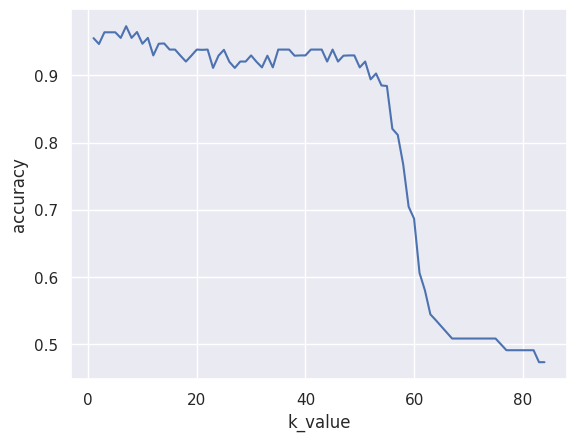

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

In [ ]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:
#
best_k = best_k   # not needed, but nice
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 7


In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [2. 0. 0. 1. 2. 0. 2. 0. 2. 1. 1. 2. 1. 0. 0. 0. 2. 1. 0. 0. 1. 0. 2. 0.
 2. 1. 0. 1. 0.]
Actual labels: [2. 0. 0. 1. 2. 0. 2. 0. 2. 1. 1. 2. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 2. 0.
 2. 1. 0. 1. 0.]

Results on test set:  28 correct out of 29 total.



row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :       setosa setosa         
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :       setosa setosa         
row   6 :    virginica virginica      
row   7 :       setosa setosa         
row   8 :    virginica virginica      
row   9 :   versicolor versicolor     
row  10 :   versicolor versicolor     
row  11 :    virginica virginica      
row  12 :   versicolor versicolor     
row  13 :       setosa setosa         
row  14 :       setosa setosa         
row  15 :       setosa setosa         
row  16 :    virginica versicolor     incorrect
row  17 :   vers

28

In [ ]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}")

Created + trained a 'final' knn classifier, with a (best) k of 7


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
# Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ],
]

# LoF =  [ [0.1,7.2,4.2,1.042] ]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict setosa from the features [4.8, 3.1, 1.6, 0.2]
I predict versicolor from the features [5.7, 2.9, 4.2, 1.3]
I predict virginica from the features [5.8, 2.7, 5.1, 1.9]
I predict setosa from the features [5.2, 4.1, 1.5, 0.1]
I predict setosa from the features [5.4, 3.4, 1.5, 0.4]
I predict versicolor from the features [5.1, 2.5, 3.0, 1.1]
I predict versicolor from the features [6.2, 2.9, 4.3, 1.3]
I predict virginica from the features [6.3, 3.3, 6.0, 2.5]
I predict versicolor from the features [5.7, 2.8, 4.1, 1.3]


### That's it! The model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,knn_model_final)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


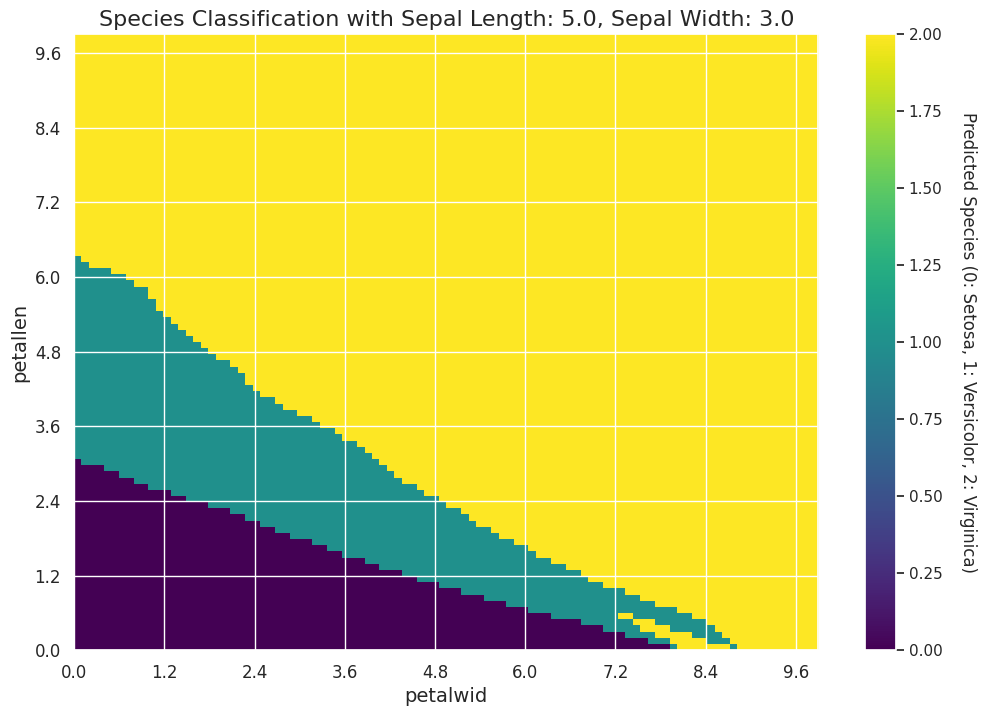

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# prompt: please plot the above heatmap, with 1/4 as many axis labels

# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code

# Create a new figure and axes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
sepallen = 5.0
sepalwid = 3.0
ax.set_title(f"Species Classification with Sepal Length: {sepallen}, Sepal Width: {sepalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# let's hold the petal length and width constant and vary sepal len + wid:

petallen = 3.42
petalwid = 3.42

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for sepallen in VERTICAL: # for every sepal length
  for sepalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,knn_model_final)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


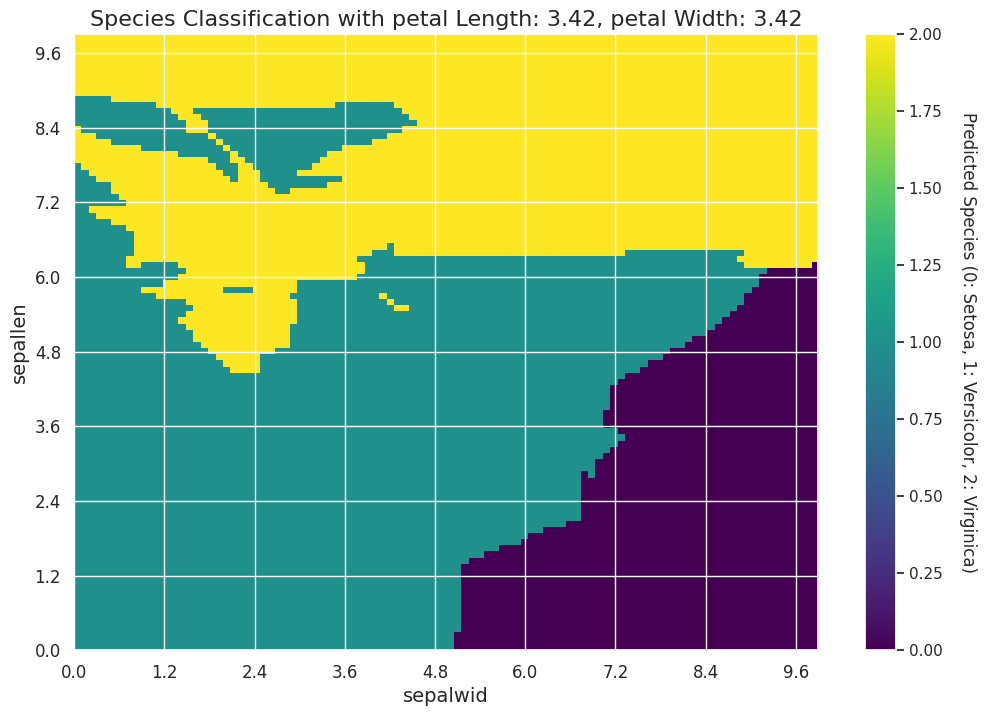

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# prompt: please plot the above heatmap, with 1/4 as many axis labels

# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code
import matplotlib.pyplot as plt
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANEv2, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("sepalwid", fontsize=14)
ax.set_ylabel("sepallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
sepallen = 5.0
sepalwid = 3.0
ax.set_title(f"Species Classification with petal Length: {petallen}, petal Width: {petalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

### check the cell above...

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#
# In fact, the rest of the hw is to run more ML workflows:   Births, Digits, Titanic, (ec) Housing, ...
#

### Yay!  

Next up:  Births modeling

# <font color="Coral"><b>To Do</b></font> &nbsp;&nbsp; Births: cleaning and modeling

Next, you'll do the same thing on the births dataset! The goal is to build a model with
1. the features being ``month`` and ``day``
2. the classification (target) to predict being above-average or below-average popularity
  + you will need to create a numeric column with 0 for "below" and 1 for "above"
  + notice the "below" and "above" are already present... _but they're strings_

So, you'll _clean up_ the `births.csv` file - with birthday popularities and then
+ be sure to drop the data that's incorrect!
  + there's an incorrect column with a url and
  + several incorrect days (April 31, for example - and others like it!)
+ be sure there is a numeric column with 0 for "below" and 1 for "above"
+ be sure to drop the column with the actual number of births

Also, drop the actual ``births`` because we're trying to predict whether a date is above-average (1, or "above") or below-average (0, or "below)
+ Thus, there will be 2 input features, to be used (`day` and `month`)
+ And 1 output (target) attribute, to be predicted

Then, adapt the iris approach to build a model:
+ Go one cell at a time!
+ create the training and testing data
+ try guessing the value of ``k`` and then building the model
+ see how well it does
+ then, use cross-validation to find the _best_ value of ``k``
  + call that ``best_k``
+ build a new model with this value of ``best_k``
+ see how well it does
+ Finally, adapt the heatmap-plots so that you get at least one heatmap-plot of the birthday-popularity, based on the two features ``day`` and ``month``

<br>

<font size="-1">For a google-docs write-up of all of this with more detail (and more hints), [here is the HMC cs35 page](https://docs.google.com/document/d/1AZbjCXwdm4wYvDmQaq4s41FLZaEhLl4uNlKUGV2eoZQ/edit?tab=t.0). It's the same, just much more detailed.</font>

<br>

### Suggestion:

Open this notebook twice!

**One window** so that you can go cell-by-cell through the iris-cleaning and iris-modeling cells...

**The second window** is to copy-paste-and-adapt the iris approach to the births data

The approach is identical.

The data-details are different, and that's where the adaptation is necessary and important.

Onward:

These are just placeholders.

You'll copy-and-edit ***lots*** of cells from the iris example.

In [ ]:
#
# a coding cell placeholder
#

# You'll copy lots of cells - mostly coding cells - from the iris example
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

filename = 'births.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

births.csv : file read into a pandas dataframe.


In [ ]:
df

,month,day,births,popularity_versus_median
0,1,1,160369,below
1,1,2,169896,below
2,1,3,180036,below
3,1,4,182854,below
4,1,5,184145,below
...,...,...,...,...
367,12,27,194006,above
368,12,28,201768,above
369,12,29,204806,above
370,12,30,206894,above


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   month                     372 non-null    int64 
 1   day                       372 non-null    int64 
 2   births                    372 non-null    int64 
 3   popularity_versus_median  372 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.8+ KB


In [ ]:
for column_name in df.columns:
    print(f"{column_name =}")

column_name ='month'
column_name ='day'
column_name ='births'
column_name ='popularity_versus_median'


In [ ]:
ROW = 0
COLUMN = 1


df_clean1 = df[df['births'] > 100000].copy()

In [ ]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 371
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   month                     365 non-null    int64 
 1   day                       365 non-null    int64 
 2   births                    365 non-null    int64 
 3   popularity_versus_median  365 non-null    object
dtypes: int64(3), object(1)
memory usage: 14.3+ KB


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('births.csv')

# 1. Convert to numeric (0/1) in the DataFrame
df['popularity'] = df['popularity_versus_median'].map({'below': 0, 'above': 1})

# 2. Print mapping verification
def convert_popularity(s):
    """Converts string to numeric value (for demonstration)"""
    return 0 if s == 'below' else 1

print("Verification of string to numeric mapping:")
for name in df['popularity_versus_median'].unique():  # Only print unique mappings
    print(f"'{name}' maps to {convert_popularity(name)}")

# 3. Show the final DataFrame with 0/1 values
print("\nDataFrame with numeric popularity (first 5 rows):")
print(df[['month', 'day', 'popularity_versus_median', 'popularity']].head())

# 4. Optional: Drop string column if no longer needed
df = df.drop(columns=['popularity_versus_median'])

Verification of string to numeric mapping:
'below' maps to 0
'above' maps to 1

DataFrame with numeric popularity (first 5 rows):
   month  day popularity_versus_median  popularity
0      1    1                    below           0
1      1    2                    below           0
2      1    3                    below           0
3      1    4                    below           0
4      1    5                    below           0


In [ ]:
df_clean1['popularity'] = df_clean1['popularity_versus_median'].map({'below': 0, 'above': 1})

# Now create df_clean2 by dropping births and the original string column
df_clean2 = df_clean1.drop(columns=['births', 'popularity_versus_median'])

# Verify the result
print("DataFrame Info:")
df_clean2.info()
print("\nFirst 5 rows with 0/1 popularity:")
print(df_clean2.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 371
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   month       365 non-null    int64
 1   day         365 non-null    int64
 2   popularity  365 non-null    int64
dtypes: int64(3)
memory usage: 19.5 KB

First 5 rows with 0/1 popularity:
   month  day  popularity
0      1    1           0
1      1    2           0
2      1    3           0
3      1    4           0
4      1    5           0


In [ ]:
COLUMNS = df_clean2.columns
print(f"COLUMNS is {COLUMNS}")
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")
print(f"COL_INDEX[ 'day' ] is {COL_INDEX[ 'day' ]}")

COLUMNS is Index(['month', 'day', 'popularity'], dtype='object')
COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'popularity': 2}
COL_INDEX[ 'day' ] is 1


In [ ]:
df_tidy = df_clean2

In [ ]:
old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is births_cleaned.csv


In [ ]:
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

births.csv : file read into a pandas dataframe.


,month,day,popularity
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


In [ ]:
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

COLUMNS is Index(['month', 'day', 'popularity'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'popularity': 2}




In [ ]:
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

births_cleaned.csv : file read into a pandas dataframe.


,month,day,popularity
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


In [ ]:
df_tidy.info()

A = df_tidy.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure it's all floating point  (www.tutorialspoint.com/numpy/numpy_data_types.htm)
print(A[0:5])               # A is too big, let's just sanity-check


<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 371
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   month       365 non-null    int64
 1   day         365 non-null    int64
 2   popularity  365 non-null    int64
dtypes: int64(3)
memory usage: 11.4 KB
[[1. 1. 0.]
 [1. 2. 0.]
 [1. 3. 0.]
 [1. 4. 0.]
 [1. 5. 0.]]


In [ ]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 365 rows and 3 cols


In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!


# Create feature and target arrays
X_all = A[:, 0:2]  # All rows, columns 0 (month) and 1 (day)
y_all = A[:, 2]     # All rows, column 2 (popularity 0/1)

# Print verification
print(f"y_all (popularity labels 0/1):\n{y_all}")
print(f"\nX_all (first 5 feature rows - month/day):\n{X_all[0:5]}")

+++ Start of data definitions +++

y_all (popularity labels 0/1):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)
print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print("+++++")
print(f"Held-out data... (testing data: {len(y_test)} rows)")
print("+++++\n")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()

training with 292 rows;  testing with 73 rows

+++++
Held-out data... (testing data: 73 rows)
+++++

y_test: [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1.]
X_test (first few rows): [[10. 14.]
 [ 6.  2.]
 [ 3. 12.]
 [ 4. 13.]
 [ 5. 16.]]



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)



Created and trained a knn classifier with k = 84


In [ ]:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test


print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1.]
Actual  labels  : [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1.]

Results on test set:  42 correct out of 73 total.


In [ ]:
def compare_labels(predicted_labels, actual_labels):
    """Compare predicted vs. actual popularity (0=below, 1=above)"""
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    # Define label name mapping
    POPULARITY_NAMES = {0: 'below', 1: 'above'}

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')
    print('-' * 60)  # Separator line

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))  # Ensure integer 0/1
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:
            result = "correct"
            num_correct += 1

        # Get string representations using the mapping
        pred_str = POPULARITY_NAMES[p]
        actual_str = POPULARITY_NAMES[a]

        # Now we can safely use string formatting
        print(f"row {i:>3d} : {pred_str:>12s} {actual_str:<12s}   {result}")

    print()
    accuracy = num_correct / NUM_LABELS
    print(f"Correct: {num_correct} out of {NUM_LABELS} ({accuracy:.1%})")
    return num_correct

compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
------------------------------------------------------------
row   0 :        above above          correct
row   1 :        below above          incorrect
row   2 :        below below          correct
row   3 :        above below          incorrect
row   4 :        above below          incorrect
row   5 :        above above          correct
row   6 :        below below          correct
row   7 :        above below          incorrect
row   8 :        below below          correct
row   9 :        below below          correct
row  10 :        below below          correct
row  11 :        above below          incorrect
row  12 :        below below          correct
row  13 :        above below          incorrect
row  14 :        above above          correct
row  15 :        below above          incorrect
row  16 :        above above          correct
row  17 :        above below          incorrect
row  18 :        below below          correct
row

42

In [ ]:
#
# Ok!  We have our knn model, we could just use it...

# data-driven predictive model (k-nearest-neighbor), using scikit-learn

# warning: this model has not yet been tuned to its "best k"
#
def predictive_model(month,day):

    bdays = np.asarray([[month,day]])                 # extra brackets needed
    prediction = knn_model.predict(bdays)   # PREDICT!

    popularity = 'above' if prediction[0] == 1 else 'below'

    return popularity

#
# Try it!
#
# days = eval(input("Enter new days: "))
#
test_dates = [(10,22),(7,4),(12,25),(12,31),(1,1)]

for month, day in test_dates:
  result = predictive_model(month, day)
  print(f"I predict {month}/{day} is {result} in popularity")


I predict 10/22 is above in popularity
I predict 7/4 is above in popularity
I predict 12/25 is above in popularity
I predict 12/31 is above in popularity
I predict 1/1 is below in popularity


In [ ]:
#
# Here, we use "cross validation" to find the "best" k...
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
all_accuracies = []

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    all_accuracies += [this_cv_accuracy]

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k


# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one


k:  1  cv accuracy:  0.7603
k:  2  cv accuracy:  0.7742
k:  3  cv accuracy:  0.8050
k:  4  cv accuracy:  0.8222
k:  5  cv accuracy:  0.8393
k:  6  cv accuracy:  0.8391
k:  7  cv accuracy:  0.8290
k:  8  cv accuracy:  0.8358
k:  9  cv accuracy:  0.8392
k: 10  cv accuracy:  0.8460
k: 11  cv accuracy:  0.8288
k: 12  cv accuracy:  0.8425
k: 13  cv accuracy:  0.8289
k: 14  cv accuracy:  0.8425
k: 15  cv accuracy:  0.8288
k: 16  cv accuracy:  0.8322
k: 17  cv accuracy:  0.8254
k: 18  cv accuracy:  0.8322
k: 19  cv accuracy:  0.8254
k: 20  cv accuracy:  0.8219
k: 21  cv accuracy:  0.8048
k: 22  cv accuracy:  0.8151
k: 23  cv accuracy:  0.8082
k: 24  cv accuracy:  0.8117
k: 25  cv accuracy:  0.8013
k: 26  cv accuracy:  0.8219
k: 27  cv accuracy:  0.8082
k: 28  cv accuracy:  0.8184
k: 29  cv accuracy:  0.8082
k: 30  cv accuracy:  0.8150
k: 31  cv accuracy:  0.8115
k: 32  cv accuracy:  0.8184
k: 33  cv accuracy:  0.8115
k: 34  cv accuracy:  0.8116
k: 35  cv accuracy:  0.8013
k: 36  cv accuracy: 

<Axes: xlabel='k_value', ylabel='accuracy'>

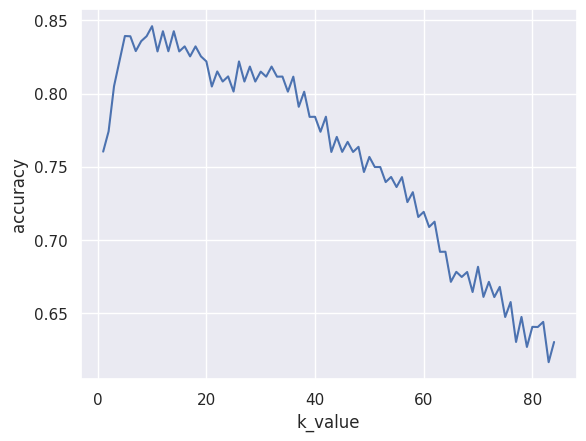

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

In [ ]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:
#
best_k = best_k   # not needed, but nice
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 10


In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1.]
Actual labels: [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1.]

Results on test set:  62 correct out of 73 total.



row   # :    predicted actual         result
------------------------------------------------------------
row   0 :        above above          correct
row   1 :        below above          incorrect
row   2 :        below below          correct
row   3 :        below below          correct
row   4 :        below below          correct
row   5 :        above above          correct
row   6 :        below below          correct
row   7 :        above below       

62

In [ ]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}")

Created + trained a 'final' knn classifier, with a (best) k of 10


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have:
# X_all - features (month, day) as 2D array
# y_all - labels (0=below, 1=above) as 1D array

# 1. Train the final model with best k=84
knn_model_final = KNeighborsClassifier(n_neighbors=84)
knn_model_final.fit(X_all, y_all)

# 2. Define predictive function
def predictive_model(features, model):
    """Predict popularity for given [month, day] features"""
    features = np.asarray([features])  # Convert to 2D array
    prediction = model.predict(features)[0]  # Get single prediction
    return prediction  # Returns 0 (below) or 1 (above)

# 3. Test dates
test_dates = [
    [7, 4],    # July 4th
    [12, 25],  # Christmas
    [2, 14],   # Valentine's
    [10, 31],  # Halloween
    [1, 1]     # New Year's
]

# 4. Prediction and display
print("Popularity Predictions (k=84):")
for month, day in test_dates:
    pred = predictive_model([month, day], knn_model_final)
    result = "above" if pred == 1 else "below"
    print(f"{month}/{day} is predicted to be {result} average in popularity")

# 5. Optional: Show model accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model_final, X_all, y_all, cv=5)
print(f"\nModel Accuracy (5-fold CV): {scores.mean():.1%}")

Popularity Predictions (k=84):
7/4 is predicted to be above average in popularity
12/25 is predicted to be above average in popularity
2/14 is predicted to be below average in popularity
10/31 is predicted to be above average in popularity
1/1 is predicted to be below average in popularity

Model Accuracy (5-fold CV): 70.1%


Month 1 completed
Month 2 completed
Month 3 completed
Month 4 completed
Month 5 completed
Month 6 completed
Month 7 completed
Month 8 completed
Month 9 completed
Month 10 completed
Month 11 completed
Month 12 completed


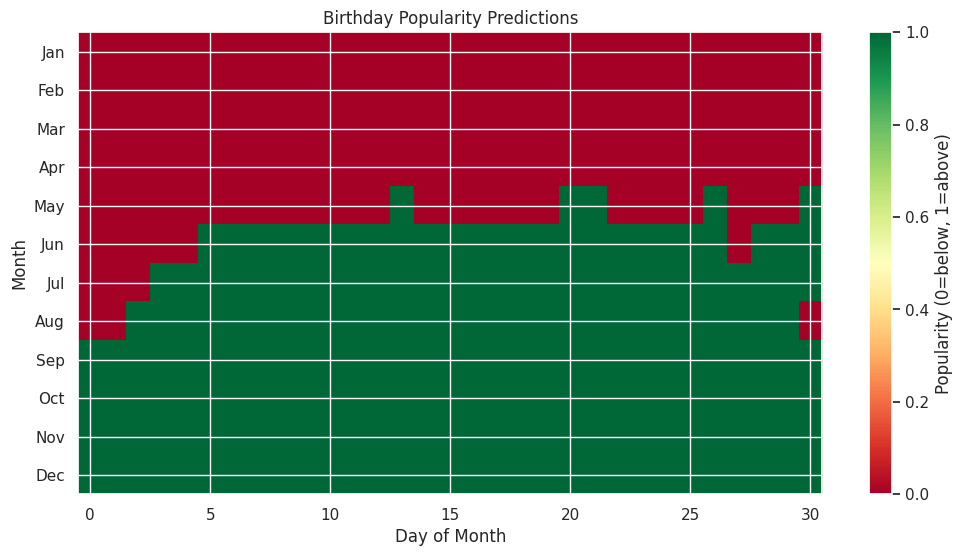

In [ ]:
# Create full month/day grid
months = np.arange(1, 13)  # All months
days = np.arange(1, 32)    # All possible days

PLANE = np.zeros((len(months), len(days)))

for i, month in enumerate(months):
    for j, day in enumerate(days):
        try:
            features = [month, day]
            PLANE[i, j] = predictive_model(features, knn_model_final)
        except:
            PLANE[i, j] = np.nan  # For invalid dates
    print(f"Month {month} completed")

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(PLANE, aspect='auto', cmap='RdYlGn')
plt.colorbar(label='Popularity (0=below, 1=above)')
plt.title('Birthday Popularity Predictions')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.yticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun',
                      'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

next up: <b>digits</b> modeling

# <font color="Coral"><b>To Do</b></font> &nbsp;&nbsp; Digits: cleaning and modeling

Next, you'll do the same thing on the births dataset! The goal is to build a model with
1. there are now 64 features! They ``pix0`` through ``pix63``
2. the classification (target) to predict is the _digit species_, which is 0 or 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9. That is, _you're predicting which digit the pixels are from_ !

So, you'll _clean up_ the `digits.csv` file
+ the only incorrect data is the column with the url at the end
+ after dropping that, the last ``actual_digit`` column is the value to predict -- it's the <i>actual_digit</i> of the pixels in the first 64 columns...

Then, _again_ adapt the iris approach to build a model:
+ Go one cell at a time!
+ create the training and testing data
+ try guessing the value of ``k`` and then building the model
+ see how well it does
+ then, use cross-validation to find the _best_ value of ``k``
  + call that ``best_k``
+ build a new model with this value of ``best_k``
+ see how well it does
+ For this example, you ***don't need to adapt the heatmap-plots*** - because it's not really reasonable to use only two features (two pixels) to predict a digit!

<br>

<font size="+1"><b>Instead</b></font>, use AI -- or the more detailed cs35 write-up of all of this -- to plot one of the digits.  [Here is the HMC cs35 page](https://docs.google.com/document/d/1AZbjCXwdm4wYvDmQaq4s41FLZaEhLl4uNlKUGV2eoZQ/edit?tab=t.0). It's the same, just much more detailed.</font>

<br>

For this hw, you don't need to complete the ***partial-digits*** portion of the cs35 assignment. <font color="DodgerBlue">But it's EC, if you'd like to try!</font>. It helps to create a single notebook cell to do the Machine Learning -- and a starting point is available on that page.

Notice that you're getting more and more practice with the "modeling workflow."

It's not an exaggeration to say that this is, in essence, what all ML/modeling efforts look-and-feel like!

In [ ]:
filename1 = 'digits.csv'
df1 = pd.read_csv(filename1)        # encoding="utf-8" et al.
print(f"{filename1} : file read into a pandas dataframe.")

digits.csv : file read into a pandas dataframe.


In [ ]:
df1

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pix0                                              1768 non-null   int64  
 1   pix1                                              1768 non-null   int64  
 2   pix2                                              1768 non-null   int64  
 3   pix3                                              1768 non-null   int64  
 4   pix4                                              1768 non-null   int64  
 5   pix5                                              1768 non-null   int64  
 6   pix6                                              1768 non-null   int64  
 7   pix7                                              1768 non-null   int64  
 8   pix8                                              1768 non-null   int64  
 9   pix9               

In [ ]:
for column_name in df1.columns:
    print(f"{column_name =}")

column_name ='pix0'
column_name ='pix1'
column_name ='pix2'
column_name ='pix3'
column_name ='pix4'
column_name ='pix5'
column_name ='pix6'
column_name ='pix7'
column_name ='pix8'
column_name ='pix9'
column_name ='pix10'
column_name ='pix11'
column_name ='pix12'
column_name ='pix13'
column_name ='pix14'
column_name ='pix15'
column_name ='pix16'
column_name ='pix17'
column_name ='pix18'
column_name ='pix19'
column_name ='pix20'
column_name ='pix21'
column_name ='pix22'
column_name ='pix23'
column_name ='pix24'
column_name ='pix25'
column_name ='pix26'
column_name ='pix27'
column_name ='pix28'
column_name ='pix29'
column_name ='pix30'
column_name ='pix31'
column_name ='pix32'
column_name ='pix33'
column_name ='pix34'
column_name ='pix35'
column_name ='pix36'
column_name ='pix37'
column_name ='pix38'
column_name ='pix39'
column_name ='pix40'
column_name ='pix41'
column_name ='pix42'
column_name ='pix43'
column_name ='pix44'
column_name ='pix45'
column_name ='pix46'
column_name ='pix47'
co

In [ ]:
ROW = 0
COLUMN = 1

df_clean5 = df1.drop('excerpted from http://yann.lecun.com/exdb/mnist/', axis=COLUMN)
df_clean5


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [ ]:
df_clean5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [ ]:
COLUMNS = df_clean5.columns  # This gets all column names
print(f"COLUMNS is {COLUMNS}")
print(f"COLUMNS[0] is {COLUMNS[0]}\n")  # Prints the first column name

# Create a dictionary to look up column indices by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # Maps column name to its index
print(f"COL_INDEX is {COL_INDEX}")

# Example usage - prints the index of 'pix0' column
print(f"COL_INDEX['pix0'] is {COL_INDEX['pix0']}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23':

In [ ]:
df_clean5

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [ ]:
old_basename = filename.split('.')[0]  # Removes extension (more robust than slicing)
cleaned_filename = old_basename + "_cleaned.csv"
df_clean5.to_csv(cleaned_filename, index=False)

In [ ]:
df_clean5_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_clean5_reread

births.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [ ]:
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
df_clean5_reread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [ ]:
A = df_clean5.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure it's all floating point  (www.tutorialspoint.com/numpy/numpy_data_types.htm)
print(A[0:5])               # A is too big, let's just sanity-check

[[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.  8.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.  9.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
   0. 14. 16. 12.  0.  0.  0.  1. 10. 16. 16. 12.  0.  0.  0.  3. 12. 14.
  16.  9.  0.  0.  0.  0.  0.  5. 16. 15.  0.

In [ ]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [ 8.  0. 15. ... 15.  7.  8.]
X_all (just the features - a few) are 
 [[ 0.  0.  9. 14.]
 [ 0.  0. 11. 12.]
 [ 0.  0.  1.  9.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  5. 12.]]


In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2) # random_state=42

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

#
# Let's print the TRAINING data
#
print("+++++")
print(f"Held-out data... (testing data: {len(y_test)} rows)")
print("+++++\n")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()

training with 1414 rows;  testing with 354 rows

+++++
Held-out data... (testing data: 354 rows)
+++++

y_test: [16. 16. 15. 16. 15. 16. 15. 14. 16. 14. 15.  3. 12. 14. 15. 13. 15. 10.
 12. 16. 16. 14.  5. 12. 16. 13. 13.  2.  6.  9. 15. 16. 13. 15.  8. 16.
  8. 12.  6. 12. 16. 10. 10. 13.  6. 16. 16.  2. 14. 16. 15.  0. 15. 16.
 16. 13.  4.  9. 16.  8. 16. 13.  6. 14. 10. 10.  5. 16. 11. 16. 16. 14.
 12. 16. 12.  4. 15. 13. 14. 14. 16. 13. 10. 16. 16. 16. 16. 10.  6. 11.
 13.  9.  6. 16.  0. 15. 14.  6. 15. 15. 16. 16. 16. 16. 15. 16. 16. 16.
 12. 13. 16. 15.  9.  6.  0. 13. 16. 14.  9. 16.  4.  8. 12. 16. 16. 15.
 12. 14. 11. 12. 14. 12. 16. 13.  9.  0.  5. 13. 13. 15. 16.  2.  8.  7.
  8. 10. 16. 11. 14.  2. 14.  3.  9. 16. 15. 12. 16. 10. 12. 16.  7. 16.
 11. 13. 16. 16. 15. 11. 15. 12. 12. 14. 15. 14. 13.  2. 15. 16. 15. 14.
  5. 14. 14. 16. 16. 16. 14. 15.  1. 10. 15. 15. 10. 14.  7. 11. 13. 15.
 11. 16. 13. 11. 10. 10.  7.  1. 10.  1. 16. 14.  9. 16. 14.  0.  7. 16.
 10.  9. 16.

In [ ]:

print("+++++")
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print("+++++\n")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

+++++
Data used for modeling... (training data: 1414 rows)
+++++

y_train: [12. 14.  3. ...  1.  1. 15.]
X_train (first few rows): [[ 0.  0.  4. 13.]
 [ 0.  0.  7. 16.]
 [ 0.  1. 15. 15.]
 [ 0.  0.  4. 13.]
 [ 0.  0.  2. 13.]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)

Created and trained a knn classifier with k = 84


In [ ]:
#
# +++ This cell is our "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [16. 16. 15. 16. 15. 16. 16. 16. 16. 15. 16. 14. 13. 15. 15. 15. 15. 16.
 16. 16. 15. 16. 16. 13. 15. 13. 16. 16. 16. 16. 14. 16. 15. 16. 16. 16.
 13. 16. 16. 16. 13. 16. 16. 16. 13. 16. 16. 16. 15. 16. 13. 12. 15. 16.
 16. 13. 16. 16. 16. 16. 16. 16. 16. 13. 15. 16. 16. 16. 16. 15. 16. 12.
 16. 15. 16. 16. 15. 16. 15. 15. 16. 16. 16. 14. 16. 16. 16. 16. 16. 12.
 13. 15. 16. 16. 15. 16. 15. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 16. 15. 16. 15. 16. 16. 16. 16. 16. 15. 15. 16. 16. 16. 16. 16. 16. 13.
 16. 16. 16. 16. 16. 16. 15. 16. 14. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 16. 16. 16. 16. 15. 12. 16. 16. 16. 16. 14. 16. 16. 13. 16. 16. 16. 16.
 16. 16. 16. 16. 16. 16. 16. 16. 15. 15. 16. 16. 15. 16. 13. 16. 16. 16.
 13. 15. 16. 15. 16. 13. 16. 15. 16. 16. 15. 16. 16. 16. 12. 16. 15. 16.
 16. 16. 16. 13. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 13. 16. 16. 16. 16. 16. 15. 15. 15. 13. 16. 13. 16. 16. 16. 16. 15. 16.
 16. 16. 16. 16. 16. 12. 16. 15. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming df_clean5 is your digits DataFrame
X_digits = df_clean5.iloc[:, :-1].values  # All pixel columns (64 features)
y_digits = df_clean5['actual_digit'].values  # Target labels (0-9)

# Train KNN specifically for digits
digits_knn = KNeighborsClassifier(n_neighbors=5)
digits_knn.fit(X_digits, y_digits)  # Now properly trained on 64 features

KNeighborsClassifier()

In [ ]:
def predict_digit(pixel_values):
    """
    Input: List of 64 pixel values (0-16)
    Output: Predicted digit (0-9)
    """
    # Validate input
    if len(pixel_values) != 64:
        raise ValueError("Must provide exactly 64 pixel values")
    if not all(0 <= p <= 16 for p in pixel_values):
        raise ValueError("Pixel values must be between 0 and 16")

    # Convert to numpy array with correct shape (1 sample, 64 features)
    pixel_array = np.array([pixel_values]).astype('float64')

    # Predict using the digits-trained model
    return int(digits_knn.predict(pixel_array)[0])

In [ ]:
sample_digit = [
    0, 0, 5, 13, 9, 1, 0, 0,
    0, 0, 13, 15, 10, 15, 5, 0,
    0, 3, 15, 2, 0, 11, 8, 0,
    0, 4, 12, 0, 0, 8, 8, 0,
    0, 5, 8, 0, 0, 9, 8, 0,
    0, 4, 11, 0, 1, 12, 7, 0,
    0, 2, 14, 5, 10, 12, 0, 0,
    0, 0, 6, 13, 10, 0, 0, 0
]  # This represents a '3'

predicted = predict_digit(sample_digit)
print(f"Predicted digit: {predicted}")

Predicted digit: 0


In [ ]:
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
all_accuracies = []

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    all_accuracies += [this_cv_accuracy]

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k


# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one


k:  1  cv accuracy:  0.1400
k:  2  cv accuracy:  0.1082
k:  3  cv accuracy:  0.1174
k:  4  cv accuracy:  0.1421
k:  5  cv accuracy:  0.1619
k:  6  cv accuracy:  0.1697
k:  7  cv accuracy:  0.1810
k:  8  cv accuracy:  0.1917
k:  9  cv accuracy:  0.1881
k: 10  cv accuracy:  0.1910
k: 11  cv accuracy:  0.2072
k: 12  cv accuracy:  0.2065
k: 13  cv accuracy:  0.2185
k: 14  cv accuracy:  0.2100
k: 15  cv accuracy:  0.2164
k: 16  cv accuracy:  0.2200
k: 17  cv accuracy:  0.2270
k: 18  cv accuracy:  0.2235
k: 19  cv accuracy:  0.2313
k: 20  cv accuracy:  0.2426
k: 21  cv accuracy:  0.2327
k: 22  cv accuracy:  0.2284
k: 23  cv accuracy:  0.2369
k: 24  cv accuracy:  0.2348
k: 25  cv accuracy:  0.2291
k: 26  cv accuracy:  0.2305
k: 27  cv accuracy:  0.2341
k: 28  cv accuracy:  0.2376
k: 29  cv accuracy:  0.2348
k: 30  cv accuracy:  0.2390
k: 31  cv accuracy:  0.2412
k: 32  cv accuracy:  0.2518
k: 33  cv accuracy:  0.2454
k: 34  cv accuracy:  0.2475
k: 35  cv accuracy:  0.2482
k: 36  cv accuracy: 

# Extra: Partial-data modeling!

<font size="+1" color="DodgerBlue"><b>As optional EC</b></font>, use the more detailed cs35 write-up of all of this -- to run this digit-modeling 64 times -- once for each "partial digit," using the first ``P`` pixels, where ``P`` loops from 1 to 63 (64, since we don't include the right endpoint.)  [Here is the HMC cs35 page](https://docs.google.com/document/d/1AZbjCXwdm4wYvDmQaq4s41FLZaEhLl4uNlKUGV2eoZQ/edit?tab=t.0).

<br>

As that page explains, tt helps to create a single notebook cell to do the Machine Learning -- and a starting point is available on that page.

<br>
<hr>
<br>


Lookin-ahead to future weeks, you'll be invited to use these machine-learning algorithms on datasets of your choice.

You can tell we're already evolving into a "final-project" mindset! 😀

So, feel free to think about a dataset you'd like to analyze for a final project...

Onward!

In [ ]:
# a placeholder code cell